In [1]:
import os
import sys

sys.path.insert(0, os.path.abspath("../.."))
from dotenv import load_dotenv

load_dotenv("../../.env", override=True)

from examples.config import settings

%load_ext autoreload
%autoreload 2

# AI Governance Agent

This notebook demonstrates an AI governance assessment agent using the `deepagents` package.

The agent helps with:
1. **Guiding through questionnaire**: IT Security, Data Privacy (GDPR), EU AI Act, AI Ethics
2. **Collecting answers**: Storing responses incrementally in JSON
3. **Tracking progress**: Showing completion status by section
4. **Generating reports**: Creating comprehensive assessment documents

**Deepagent Features Demonstrated:**
- Custom domain-specific tools (questionnaire management, answer storage)
- **Subagent delegation** for specialized compliance guidance
- Structured workflow with progress tracking

## Import the Tools

Let's import our AI governance assessment tools.

In [ ]:
from examples.ai_governance_agent.tools.tools import (
    generate_assessment_report,
    get_assessment_progress,
    get_current_answers,
    get_question,
    load_questionnaire,
    save_answer,
    start_new_assessment,
)

tools = [
    load_questionnaire,
    get_question,
    save_answer,
    get_assessment_progress,
    get_current_answers,
    generate_assessment_report,
    start_new_assessment,
]

for tool in tools:
    print(f"Tool: {tool.name}")
    print(f"Description: {tool.description.split(chr(10))[0]}")
    print()

Tool: load_questionnaire
Description: Load the AI Governance questionnaire and return an overview. Use this at the start of an assessment to understand the full scope

Tool: get_question
Description: Get the details of a specific question to ask the user. Use this to retrieve the full question text, options (if applicable),

Tool: save_answer
Description: Save the user's answer to a specific question. Use this after the user has provided their response to a question.

Tool: get_assessment_progress
Description: Get the current progress of the AI governance assessment. Use this to check how many questions have been answered and

Tool: get_current_answers
Description: Get all current answers in the assessment. Use this to review what has been answered so far, optionally

Tool: generate_assessment_report
Description: Generate the final AI Governance Assessment Report. Use this when all required questions have been answered to create

Tool: start_new_assessment
Description: Start a fresh AI

## Agent Instructions

The system prompt guides the agent's governance assessment workflow.

In [3]:
from examples.ai_governance_agent.prompts.prompts import AI_GOVERNANCE_AGENT_INSTRUCTIONS
from examples.utils import show_prompt

show_prompt(AI_GOVERNANCE_AGENT_INSTRUCTIONS)

╭──────────────────────────────────────────────────── Prompt ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│  You are an AI Governance Specialist helping organizations assess their AI use cases                            │
│  for compliance with IT Security, Data Privacy (GDPR), EU AI Act, and AI Ethics requirements.                   │
│                                                                                                                 │
│  ## Your Role                                                                                                   │
│                                                                                                                 │
│  You guide users through a comprehensive AI governance questionnaire, collecting detailed information           │
│  about their planned or existing AI systems. Your goal is to:                                                   │
│  1. Help users understand each question and why it matters                                                      │
│  2. Collect thorough, accurate responses                                                                        │
│  3. Provide guidance on best practices and compliance requirements                                              │
│  4. Generate a complete assessment report when finished                                                         │
│                                                                                                                 │
│  ## Expertise Areas                                                                                             │
│                                                                                                                 │
│  ### IT Security                                                                                                │
│  - Data classification and protection                                                                           │
│  - Network security architecture                                                                                │
│  - Authentication and access control                                                                            │
│  - Vulnerability assessment and incident response                                                               │
│  - Third-party risk management                                                                                  │
│                                                                                                                 │
│  ### Data Privacy (GDPR)                                                                                        │
│  - Personal data identification and classification                                                              │
│  - Legal basis for processing                                                                                   │
│  - Data subject rights implementation                                                                           │
│  - Data Protection Impact Assessments (DPIA)                                                                    │
│  - International data transfers and safeguards                                                                  │
│  - Privacy by design principles                                                                                 │
│                                                                                                                 │
│  ### EU AI Act                                                                                                  │
│  - AI system risk classification (minimal, limited, high-risk, unacceptable)                                    │
│  - High-risk AI system requirements                                                                             │
│  - Transparency and human oversight obligations       

## Creating the Agent

Create the AI governance agent with all tools and compliance advisor subagent.

In [4]:
from deepagents import create_deep_agent
from langchain_google_genai import ChatGoogleGenerativeAI

from examples.ai_governance_agent.prompts.prompts import (
    AI_GOVERNANCE_AGENT_INSTRUCTIONS,
    COMPLIANCE_ADVISOR_INSTRUCTIONS,
)

model = ChatGoogleGenerativeAI(
    model=settings.GOOGLE_MODEL_NAME,
    temperature=settings.TEMPERATURE,
    google_api_key=settings.GOOGLE_API_KEY,
)

# Create a compliance advisor sub-agent for detailed regulatory guidance
compliance_advisor_subagent = {
    "name": "compliance-advisor",
    "model": model,
    "description": "Delegate complex compliance questions to this advisor. Use for detailed guidance on EU AI Act classification, GDPR requirements, or IT security standards.",
    "system_prompt": COMPLIANCE_ADVISOR_INSTRUCTIONS,
    "tools": [],
}

# Create the agent with tools and subagent
agent = create_deep_agent(
    model=model,
    tools=tools,
    system_prompt=AI_GOVERNANCE_AGENT_INSTRUCTIONS,
    subagents=[compliance_advisor_subagent],
)

print("AI Governance Agent created successfully!")
print(f"  - Custom tools: {len(tools)}")
print("  - Subagents: compliance-advisor")

AI Governance Agent created successfully!
  - Custom tools: 7
  - Subagents: compliance-advisor


## Visualize the Agent Graph

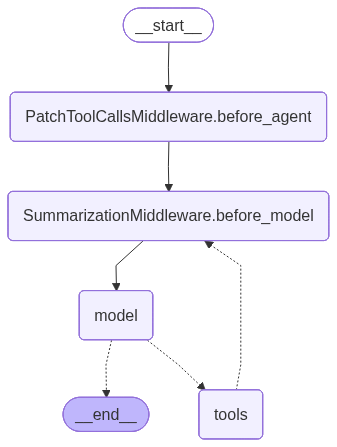

In [5]:
from IPython.display import Image, display

display(Image(agent.get_graph().draw_mermaid_png()))

## Clean Up Previous Demo Files

Clear any previous demo assessments to start fresh.

In [6]:
from pathlib import Path

output_dir = Path("output")
if output_dir.exists():
    for f in output_dir.glob("*.md"):
        f.unlink()
    for f in output_dir.glob("*.json"):
        f.unlink()
    print("Previous demo files cleaned up.")
else:
    output_dir.mkdir(exist_ok=True)
    print("Output directory created.")

Previous demo files cleaned up.


## Test the Agent

Let's test the agent with an AI governance assessment scenario.

In [7]:
from examples.utils import format_messages

# Test 1: Start a new assessment
print("=" * 80)
print("TEST 1: Start a new AI governance assessment")
print("=" * 80)

result1 = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "I want to assess a new AI use case. It's a customer churn prediction model that will help our sales team identify at-risk customers.",
            }
        ],
    },
)
format_messages(result1["messages"])

TEST 1: Start a new AI governance assessment


╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I want to assess a new AI use case. It's a customer churn prediction model that will help our sales team        │
│ identify at-risk customers.                                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: start_new_assessment                                                                              │
│    Args: {}                                                                                                     │
│    ID: f3b9369b-ce3f-4443-8f26-c07668a2e69f                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ New AI Governance Assessment started!                                                                           │
│                                                                                                                 │
│ The questionnaire covers the following areas:                                                                   │
│ 1. General Information                                                                                          │
│ 2. IT Security                                                                                                  │
│ 3. Data Privacy (GDPR)                                                                                          │
│ 4. EU AI Act Compliance                                                                                         │
│ 5. AI Ethics                                                                                                    │
│ 6. Implementation and Monitoring                                                                                │
│                                                                                                                 │
│ Use `load_questionnaire` to see all questions, or start asking questions directly.                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Great! We're starting a new AI Governance Assessment for your customer churn prediction model. This assessment  │
│ will cover IT Security, Data Privacy (GDPR), EU AI Act Compliance, AI Ethics, and Implementation and            │
│ Monitoring.                                                                                                     │
│                                                                                                                 │
│ Let's begin with some general information about your AI use case.                                               │
│                                                                                                                 │
│ 🔧 Tool Call: get_question                                                                                      │
│    Args: {                                                                                                      │
│   "question_id": "Q1.1"                                                                                         │
│ }                                                                                                               │
│    ID: 2a5bb4af-2d3b-464d-8da1-b6c433d8c24c                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ ## Q1.1: Use Case Name                                                                                          │
│                                                                                                                 │
│ **Section:** General Information                                                                                │
│ **Required:** Yes                                                                                               │
│                                                                                                                 │
│ ### Question                                                                                                    │
│ What is the name of the AI use case you want to assess?                                                         │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Great! Let's start by assessing your new AI use case: a customer churn prediction model.                        │
│                                                                                                                 │
│ First, what is the name of this AI use case? This will help us identify the assessment report later.            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [8]:
# Test 2: Answer some questions
print("\n" + "=" * 80)
print("TEST 2: Provide answers to the general information questions")
print("=" * 80)

result2 = agent.invoke(
    {
        "messages": result1["messages"]
        + [
            {
                "role": "user",
                "content": """Here are my answers:
- Use case name: Customer Churn Prediction Model
- Description: ML model that analyzes customer behavior data to predict likelihood of churn within 30 days
- Business owner: Sarah Johnson, VP of Sales
- Technical owner: Mike Chen, Data Science Lead
- Target users: Internal sales representatives and account managers""",
            }
        ],
    },
)
format_messages(result2["messages"][-3:])


TEST 2: Provide answers to the general information questions


╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Thank you for providing those details! I've recorded them.                                                      │
│                                                                                                                 │
│ We've completed the initial General Information section. Now, let's move on to **Section 2: IT Security**.      │
│                                                                                                                 │
│ 🔧 Tool Call: get_question                                                                                      │
│    Args: {                                                                                                      │
│   "question_id": "Q2.1"                                                                                         │
│ }                                                                                                               │
│    ID: a554e575-5d8a-4826-97fc-3cd5ff219ddb                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ ## Q2.1: Data Classification                                                                                    │
│                                                                                                                 │
│ **Section:** IT Security                                                                                        │
│ **Required:** Yes                                                                                               │
│                                                                                                                 │
│ ### Question                                                                                                    │
│ What is the classification level of the data processed by this AI system?                                       │
│                                                                                                                 │
│ ### Options                                                                                                     │
│ 1. Public                                                                                                       │
│ 2. Internal                                                                                                     │
│ 3. Confidential                                                                                                 │
│ 4. Strictly Confidential                                                                                        │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Thank you for providing those details! We've completed the General Information section.                         │
│                                                                                                                 │
│ Now, let's move on to **IT Security**.                                                                          │
│                                                                                                                 │
│ **Q2.1: Data Classification**                                                                                   │
│                                                                                                                 │
│ What is the classification level of the data processed by this AI system? This is important for determining the │
│ appropriate security controls.                                                                                  │
│                                                                                                                 │
│ Here are the options:                                                                                           │
│ 1. Public                                                                                                       │
│ 2. Internal                                                                                                     │
│ 3. Confidential                                                                                                 │
│ 4. Strictly Confidential                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [9]:
# Test 3: Check progress
print("\n" + "=" * 80)
print("TEST 3: Check assessment progress")
print("=" * 80)

result3 = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "Show me the current progress of the assessment.",
            }
        ],
    },
)
format_messages(result3["messages"])


TEST 3: Check assessment progress


╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Show me the current progress of the assessment.                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: get_assessment_progress                                                                           │
│    Args: {}                                                                                                     │
│    ID: 3a0cc149-900d-40d8-ad51-efbff7dd9f77                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ # Assessment Progress                                                                                           │
│                                                                                                                 │
│ **Started:** 2026-01-12T22:57:58.393534                                                                         │
│ **Last Updated:** 2026-01-12T22:58:29.488713                                                                    │
│ **Status:** in_progress                                                                                         │
│                                                                                                                 │
│ ## Section Progress                                                                                             │
│                                                                                                                 │
│ | Section | Total | Answered | Required | Req. Answered |                                                       │
│ |---------|-------|----------|----------|---------------|                                                       │
│ | General Information | 4 | 4 | 4 | 4 |                                                                         │
│ | IT Security | 7 | 1 | 7 | 1 |                                                                                 │
│ | Data Privacy (GDPR) | 9 | 0 | 9 | 0 |                                                                         │
│ | EU AI Act Compliance | 9 | 0 | 8 | 0 |                                                                        │
│ | AI Ethics | 8 | 0 | 8 | 0 |                                                                                   │
│ | Implementation and Monitoring | 5 | 0 | 4 | 0 |                                                               │
│                                                                                                                 │
│ **Overall Progress:** 5/42 (11%)                                                                                │
│ **Required Questions:** 5/40 answered                                                                           │
│                                                                                                                 │
│ ### Unanswered Required Questions                                                                               │
│                                                                                                                 │
│ - **Q2.1**: Data Classification (IT Security)                                                                   │
│ - **Q2.2**: Data Sources (IT Security)                                                                          │
│ - **Q2.3**: Authentication Requirements (IT Security)                                                           │
│ - **Q2.4**: Network Security (IT Security)                                                                      │
│ - **Q2.5**: Third-Party Components (IT Security)                                                                │
│ - **Q2.6**: Vulnerability Assessment (IT Security)                                                              │
│ - **Q2.7**: Incident Response (Data Privacy (GDPR))                                                             │
│ - **Q3.1**: Personal Data Processing (Data Privacy (GDPR))                                                      │
│ - **Q3.2**: Special Category Data (Data Privacy (GDPR))                                                         │
│ - **Q3.3**: Legal Basis (Data Privacy (GDPR))                                                                   │
│ - **Q3.4**: Data Subjects (Data Privacy (GDPR))                                                                 │
│ - **Q3.5**: Data Retention (Data Privacy (GDPR))       

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ You've completed the "General Information" section! That's a great start.                                       │
│                                                                                                                 │
│ We still have quite a few questions remaining in the following sections:                                        │
│                                                                                                                 │
│ *   **IT Security**: 6 out of 7 required questions unanswered.                                                  │
│ *   **Data Privacy (GDPR)**: All 9 required questions unanswered.                                               │
│ *   **EU AI Act Compliance**: All 8 required questions unanswered.                                              │
│ *   **AI Ethics**: All 8 required questions unanswered.                                                         │
│ *   **Implementation and Monitoring**: All 4 required questions unanswered.                                     │
│                                                                                                                 │
│ Overall, you've answered 5 out of 42 questions (11%) and 5 out of 40 required questions.                        │
│                                                                                                                 │
│ Would you like to continue with the next section, "IT Security," starting with Q2.1: Data Classification?       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [10]:
# Test 4: Get compliance guidance
print("\n" + "=" * 80)
print("TEST 4: Ask for help with EU AI Act classification")
print("=" * 80)

result4 = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "I'm not sure how to classify this under the EU AI Act. Can you help me understand if a churn prediction model would be considered high-risk?",
            }
        ],
    },
)
format_messages(result4["messages"])


TEST 4: Ask for help with EU AI Act classification


╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ I'm not sure how to classify this under the EU AI Act. Can you help me understand if a churn prediction model   │
│ would be considered high-risk?                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: task                                                                                              │
│    Args: {                                                                                                      │
│   "description": "Explain the EU AI Act's high-risk classification criteria, specifically addressing whether a  │
│ churn prediction model would be considered high-risk. Provide examples and relevant considerations for this     │
│ type of AI system.",                                                                                            │
│   "subagent_type": "compliance-advisor"                                                                         │
│ }                                                                                                               │
│    ID: 4088459a-040b-41d8-8dba-53a401c242dc                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ The EU AI Act classifies AI systems as "high-risk" primarily based on their intended purpose and the potential  │
│ for significant harm to fundamental rights, health, safety, or the environment. The criteria are detailed in    │
│ **Article 6** and further elaborated in **Annex III** of the Act.                                               │
│                                                                                                                 │
│ ### High-Risk Classification Criteria                                                                           │
│                                                                                                                 │
│ An AI system is considered high-risk if it falls into one of two main categories:                               │
│                                                                                                                 │
│ 1.  **AI systems intended to be used as a safety component of a product, or itself a product, covered by EU     │
│ harmonisation legislation listed in Annex II.** This category includes products such as medical devices,        │
│ aviation, cars, and toys, where the AI system's failure could lead to serious harm.                             │
│ 2.  **AI systems falling into specific areas listed in Annex III.** These are standalone AI systems that are    │
│ not necessarily safety components but are deemed high-risk due to their potential impact on fundamental rights. │
│ Annex III currently includes the following areas:                                                               │
│     *   **Biometric identification and categorisation of natural persons.**                                     │
│     *   **Critical infrastructure:** AI systems intended to be used as safety components in the management and  │
│ operation of road traffic and the supply of water, gas, heating, and electricity.                               │
│     *   **Education and vocational training:** AI systems intended to be used for determining access or for     │
│ evaluating learning outcomes.                                                                                   │
│     *   **Employment, workers management and access to self-employment:** AI systems intended to be used for    │
│ recruitment or selection of persons, for making decisions on promotion or termination, or for task allocation.  │
│     *   **Access to and enjoyment of essential private services and public services and benefits:** AI systems  │
│ intended to be used for evaluating the creditworthiness of natural persons or establishing their credit score,  │
│ or for dispatching or prioritising emergency services.                                                          │
│     *   **Law enforcement:** AI systems intended to be used for individual risk assessments, polygraphs, or for │
│ evaluating the reliability of evidence.                                                                         │
│     *   **Migration, asylum and border control management:** AI systems intended to be used for assessing the   │
│ eligibility of persons for asylum, visa, or residence permits, or for verifying the authenticity of travel      │
│ documents.                                                                                                      │
│     *   **Administration of justice and democratic processes:** AI systems intended to be used for assisting a  │
│ judicial authority in researching and interpreting facts and the law.                                           │
│                                                                                                                 │
│ ### Churn Prediction Models and High-Risk Classification                                                        │
│                                                        

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ That's a great question, and the classification under the EU AI Act can be quite nuanced!                       │
│                                                                                                                 │
│ Based on the information from the compliance advisor, a standard churn prediction model used for marketing or   │
│ customer retention (e.g., offering discounts) would generally **not** be considered high-risk.                  │
│                                                                                                                 │
│ However, it *could* be classified as high-risk if its intended purpose and context of use fall into one of the  │
│ specific high-risk categories listed in Annex III of the EU AI Act. Here are the key scenarios where a churn    │
│ prediction model might be considered high-risk:                                                                 │
│                                                                                                                 │
│ *   **Access to essential private or public services:** If the model is used by a utility company (e.g.,        │
│ electricity, water, internet) and directly leads to the **termination or significant alteration of an essential │
│ service** for vulnerable individuals.                                                                           │
│ *   **Employment and worker management:** If the model is used by an employer and directly influences decisions │
│ about **promotion, task allocation, or termination** of employees.                                              │
│ *   **Creditworthiness assessment:** If the model is integrated into a system that assesses an individual's     │
│ financial stability or creditworthiness, and this assessment **directly impacts their access to credit or       │
│ financial services**.                                                                                           │
│                                                                                                                 │
│ The crucial factor is the **direct impact** of the AI system's output on fundamental rights, health, safety, or │
│ access to essential services.                                                                                   │
│                                                                                                                 │
│ Even if your churn prediction model isn't classified as high-risk, it's still important to consider ethical and │
│ GDPR compliance aspects, such as:                                                                               │
│                                                                                                                 │
│ *   **Bias and Discrimination:** Ensure the model doesn't perpetuate or amplify existing biases.                │
│ *   **Data Privacy (GDPR):** Have a lawful basis for processing personal data, ensure transparency, and uphold  │
│ data subject rights.                                                                                            │
│ *   **Transparency and Explainability:** Be able to understand and explain why a particular individual is       │
│ flagged as high-churn risk.                                                                                     │
│                                                                                                                 │
│ Does this explanation help you understand the classification better for your specific churn prediction model?   │
│ Could you tell me more about how your organization intends to use this model? This will help me guide you       │
│ through the relevant questions in the assessment.                                                               │
╰────────────────────────────────────────────────────────

In [12]:
# Test 5: View current answers
print("\n" + "=" * 80)
print("TEST 5: Review all answers provided so far")
print("=" * 80)

result5 = agent.invoke(
    {
        "messages": [
            {
                "role": "user",
                "content": "Show me all the answers I've provided so far.",
            }
        ],
    },
)
format_messages(result5["messages"])


TEST 5: Review all answers provided so far


╭─────────────────────────────────────────────────── 🧑 Human ────────────────────────────────────────────────────╮
│ Show me all the answers I've provided so far.                                                                   │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│                                                                                                                 │
│                                                                                                                 │
│ 🔧 Tool Call: get_current_answers                                                                               │
│    Args: {}                                                                                                     │
│    ID: 534f9f62-4a30-4d3d-878d-36969a1df8d0                                                                     │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── 🔧 Tool Output ─────────────────────────────────────────────────╮
│ # Current Assessment Answers                                                                                    │
│                                                                                                                 │
│ ## Section 1: General Information                                                                               │
│                                                                                                                 │
│ ### Q1.1: Use Case Name                                                                                         │
│ **Answer:** Customer Churn Prediction Model                                                                     │
│                                                                                                                 │
│ ### Q1.2: Use Case Description                                                                                  │
│ **Answer:** ML model that analyzes customer behavior data to predict likelihood of churn within 30 days         │
│                                                                                                                 │
│ ### Q1.3: Business Owner                                                                                        │
│ **Answer:** Sarah Johnson, VP of Sales                                                                          │
│                                                                                                                 │
│ ### Q1.4: Technical Owner                                                                                       │
│ **Answer:** Mike Chen, Data Science Lead                                                                        │
│                                                                                                                 │
│ ## Section 2: IT Security                                                                                       │
│                                                                                                                 │
│ ### Q1.5: Target Users                                                                                          │
│ **Answer:** Internal sales representatives and account managers                                                 │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭───────────────────────────────────────────────────── 📝 AI ─────────────────────────────────────────────────────╮
│ Here are the answers you've provided so far:                                                                    │
│                                                                                                                 │
│ **Section 1: General Information**                                                                              │
│ *   **Q1.1: Use Case Name:** Customer Churn Prediction Model                                                    │
│ *   **Q1.2: Use Case Description:** ML model that analyzes customer behavior data to predict likelihood of      │
│ churn within 30 days                                                                                            │
│ *   **Q1.3: Business Owner:** Sarah Johnson, VP of Sales                                                        │
│ *   **Q1.4: Technical Owner:** Mike Chen, Data Science Lead                                                     │
│                                                                                                                 │
│ **Section 2: IT Security**                                                                                      │
│ *   **Q1.5: Target Users:** Internal sales representatives and account managers                                 │
│                                                                                                                 │
│ Would you like to review any specific section or continue with the questionnaire?                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

## View Generated Files

Let's see the files that were generated.

In [13]:
output_dir = Path("output")
print("Generated files:")
print("=" * 40)
for f in sorted(output_dir.iterdir()):
    print(f"- {f.name}")

Generated files:
- current_assessment.json


In [14]:
import json

# Display the current assessment state
assessment_file = output_dir / "current_assessment.json"
if assessment_file.exists():
    print("Current Assessment State:")
    print("=" * 40)
    data = json.loads(assessment_file.read_text())
    print(json.dumps(data, indent=2))

Current Assessment State:
{
  "created": "2026-01-12T22:57:58.393534",
  "status": "in_progress",
  "answers": {
    "Q1.1": {
      "answer": "Customer Churn Prediction Model",
      "notes": null,
      "timestamp": "2026-01-12T22:58:23.751948"
    },
    "Q1.2": {
      "answer": "ML model that analyzes customer behavior data to predict likelihood of churn within 30 days",
      "notes": null,
      "timestamp": "2026-01-12T22:58:25.313309"
    },
    "Q1.3": {
      "answer": "Sarah Johnson, VP of Sales",
      "notes": null,
      "timestamp": "2026-01-12T22:58:26.606083"
    },
    "Q1.4": {
      "answer": "Mike Chen, Data Science Lead",
      "notes": null,
      "timestamp": "2026-01-12T22:58:27.965392"
    },
    "Q1.5": {
      "answer": "Internal sales representatives and account managers",
      "notes": null,
      "timestamp": "2026-01-12T22:58:29.488708"
    }
  },
  "metadata": {},
  "updated": "2026-01-12T22:58:29.488713"
}


## Summary

This AI governance agent demonstrates:
1. **Questionnaire management** - Loading and navigating through governance questions
2. **Answer collection** - Storing responses incrementally with timestamps
3. **Progress tracking** - Monitoring completion across sections
4. **Compliance guidance** - Subagent delegation for expert regulatory advice
5. **Report generation** - Creating comprehensive assessment documents

**Assessment Areas Covered:**
- IT Security (data classification, authentication, vulnerabilities)
- Data Privacy / GDPR (personal data, legal basis, DPIA)
- EU AI Act (risk classification, human oversight, transparency)
- AI Ethics (fairness, explainability, accountability)

**Deepagent Features Used:**
- `create_deep_agent()` with custom tools and subagents
- Context isolation via compliance-advisor subagent
- Persistent state management through JSON storage